In [29]:
# python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b <b> -lr <r> -rtg --nn_baseline --exp_name q4_search_b<b>_lr<r>_rtg_nnbaseline
for b in [10000, 30000, 50000]:
    for lr in [0.005, 0.01, 0.02]:
        print(f'''python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b {b} -lr {lr} -rtg --nn_baseline --exp_name q4_search_b{b}_lr{lr}_rtg_nnbaseline''')

python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b 10000 -lr 0.005 -rtg --nn_baseline --exp_name q4_search_b10000_lr0.005_rtg_nnbaseline
python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b 10000 -lr 0.01 -rtg --nn_baseline --exp_name q4_search_b10000_lr0.01_rtg_nnbaseline
python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b 10000 -lr 0.02 -rtg --nn_baseline --exp_name q4_search_b10000_lr0.02_rtg_nnbaseline
python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b 30000 -lr 0.005 -rtg --nn_baseline --exp_name q4_search_b30000_lr0.005_rtg_nnbaseline
python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.95 -n 100 -l 2 -s 32 -b 30000 -lr 0.01 -rtg --nn_baseline --exp_name q4_search_b30000_lr0.01_rtg_nnbaseline
python cs285/scripts/run_hw2.py --en

In [30]:
import os
import tensorflow as tf
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

figsize=(5.7, 3)
export_dir = os.path.join('soln_pdf', 'figures')

sns.set_theme()
sns.set_context("paper")

In [31]:
def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

# Experiment 1

In [32]:
def read_q1_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir('data'):
        split = folder.split('_')
        if 'CartPole-v0' in split and batch in split:
            config_list = split[split.index(batch):split.index('CartPole-v0')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join('data', folder, 'events*')
            eventfile = glob.glob(logdir)[0]

            X, Y = get_section_results(eventfile)
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Config': np.repeat(config, len(X)), 
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
        
    return full_data

data_lb = read_q1_data('lb')
data_lb

,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,lb_no_rtg_dsa,5029.0,33.333332,33.333332
1,1,lb_no_rtg_dsa,10049.0,31.538462,32.051282
2,2,lb_no_rtg_dsa,15058.0,52.500000,45.159434
3,3,lb_no_rtg_dsa,20062.0,82.800003,68.337124
4,4,lb_no_rtg_dsa,25082.0,71.833336,70.456554
...,...,...,...,...,...
295,95,lb_rtg_na,483803.0,200.000000,200.000000
296,96,lb_rtg_na,488803.0,200.000000,200.000000
297,97,lb_rtg_na,493803.0,200.000000,200.000000
298,98,lb_rtg_na,498803.0,200.000000,200.000000


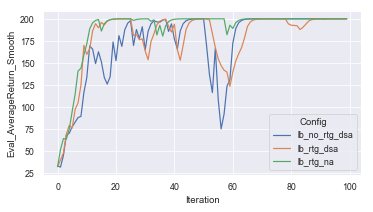

In [42]:
plt.figure(figsize=figsize)
sns.lineplot(data=data_lb, x='Iteration', y='Eval_AverageReturn_Smooth', hue='Config')

plt.savefig(os.path.join(export_dir, 'q1_lb.pdf'), bbox_inches='tight')

In [34]:
data_sb = read_q1_data('sb')
data_sb

,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,sb_no_rtg_dsa,1023.0,31.153847,31.153847
1,1,sb_no_rtg_dsa,2023.0,37.454544,35.654345
2,2,sb_no_rtg_dsa,3073.0,70.166664,57.777626
3,3,sb_no_rtg_dsa,4078.0,61.857143,60.289644
4,4,sb_no_rtg_dsa,5105.0,76.571426,70.159784
...,...,...,...,...,...
295,95,sb_rtg_na,102729.0,113.250000,112.758415
296,96,sb_rtg_na,103740.0,105.750000,108.553366
297,97,sb_rtg_na,104754.0,112.500000,110.921346
298,98,sb_rtg_na,105792.0,120.250000,116.518539


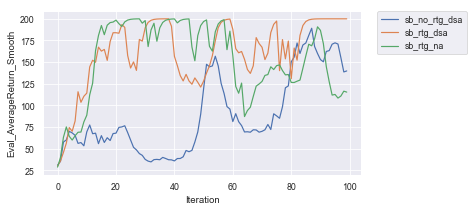

In [53]:
plt.figure(figsize=figsize)
sns.lineplot(data=data_sb, x='Iteration', y='Eval_AverageReturn_Smooth', hue='Config')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(export_dir, 'q1_sb.pdf'), bbox_inches='tight')

# Experiment 2

In [50]:
def read_q2_data():
    full_data = pd.DataFrame()

    for folder in os.listdir('data'):
        split = folder.split('_')
        if 'q2' in split and 'b500' not in split:
            config_list = split[split.index('q2')+1:split.index('InvertedPendulum-v2')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join('data', folder, 'events*')
            eventfile = glob.glob(logdir)[0]

            X, Y = get_section_results(eventfile)
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Config': np.repeat(config, len(X)), 
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
        
    return full_data

data_q2 = read_q2_data()
data_q2

,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,b100_r0.01,104.0,15.222222,15.222222
1,1,b100_r0.01,227.0,19.666666,18.396825
2,2,b100_r0.01,327.0,15.923077,16.811089
3,3,b100_r0.01,437.0,18.409090,17.795080
4,4,b100_r0.01,547.0,42.599998,32.832009
...,...,...,...,...,...
595,95,b90_r0.06,16991.0,2.000000,2.000000
596,96,b90_r0.06,17081.0,2.000000,2.000000
597,97,b90_r0.06,17171.0,2.000000,2.000000
598,98,b90_r0.06,17261.0,2.000000,2.000000


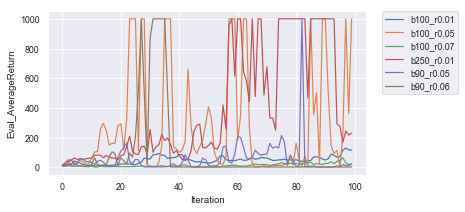

In [55]:
plt.figure(figsize=figsize)
sns.lineplot(data=data_q2, x='Iteration', y='Eval_AverageReturn', hue='Config')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(export_dir, 'q2.pdf'), bbox_inches='tight')

# Experiment 3

In [36]:
def read_q3_data():
    full_data = pd.DataFrame()

    for folder in os.listdir('data'):
        split = folder.split('_')
        if 'LunarLanderContinuous-v2' in split:
            config_list = split[split.index('q3')+1:split.index('LunarLanderContinuous-v2')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join('data', folder, 'events*')
            eventfile = glob.glob(logdir)[0]

            X, Y = get_section_results(eventfile)
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Config': np.repeat(config, len(X)), 
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
        
    return full_data

data_q3 = read_q3_data()
data_q3

,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,b40000_r0.005,40138.0,-162.545059,-162.545059
1,1,b40000_r0.005,80248.0,-120.903717,-132.801243
2,2,b40000_r0.005,120568.0,-93.299141,-107.479383
3,3,b40000_r0.005,160657.0,-105.781052,-106.433612
4,4,b40000_r0.005,200734.0,-149.620331,-132.613728
...,...,...,...,...,...
95,95,b40000_r0.005,3875555.0,198.150970,175.646526
96,96,b40000_r0.005,3915751.0,160.729980,166.696599
97,97,b40000_r0.005,3955787.0,171.247940,169.427404
98,98,b40000_r0.005,3995800.0,91.194664,122.487760


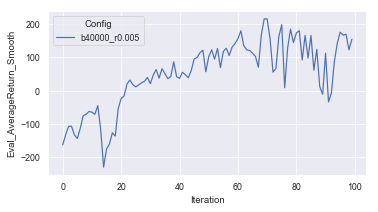

In [44]:
plt.figure(figsize=figsize)
sns.lineplot(data=data_q3, x='Iteration', y='Eval_AverageReturn_Smooth', hue='Config')

plt.savefig(os.path.join(export_dir, 'q3.pdf'), bbox_inches='tight')

# Experiment 4

In [38]:
def read_q4_data():
    full_data = pd.DataFrame()

    for folder in os.listdir('data'):
        split = folder.split('_')
        if 'HalfCheetah-v2' in split and 'search' in split:
            config_list = split[split.index('search')+1:split.index('rtg')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join('data', folder, 'events*')
            eventfile = glob.glob(logdir)[0]

            X, Y = get_section_results(eventfile)
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Config': np.repeat(config, len(X)), 
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()

            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
        
    return full_data

data_q4 = read_q4_data()
data_q4

,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,b10000_lr0.005,10050.0,-79.528511,-79.528511
1,1,b10000_lr0.005,20100.0,-78.445366,-78.754836
2,2,b10000_lr0.005,30150.0,-109.644989,-98.556216
3,3,b10000_lr0.005,40200.0,-48.190552,-67.542876
4,4,b10000_lr0.005,50250.0,-77.503677,-73.581189
...,...,...,...,...,...
895,95,b50000_lr0.02,4809600.0,245.731613,248.289859
896,96,b50000_lr0.02,4859700.0,307.727203,283.952266
897,97,b50000_lr0.02,4909800.0,312.845490,301.288200
898,98,b50000_lr0.02,4959900.0,214.335098,249.116339


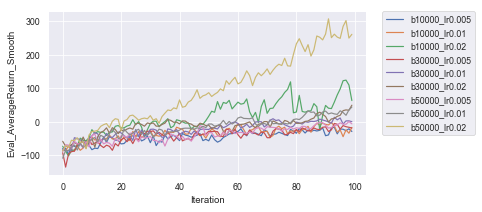

In [45]:
plt.figure(figsize=figsize)
sns.lineplot(data=data_q4, x='Iteration', y='Eval_AverageReturn_Smooth', hue='Config')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(export_dir, 'q4_search.pdf'), bbox_inches='tight')

The yellowish-green line with `batch_size=50000` and `lr=0.02` performed the best out of all of the configurations.

In [40]:
def read_q4_optimal_data():
    full_data = pd.DataFrame()

    for folder in os.listdir('data'):
        split = folder.split('_')
        if 'HalfCheetah-v2' in split and 'search' not in split:
            config_list = split[split.index('q4')+1:split.index('HalfCheetah-v2')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join('data', folder, 'events*')
            eventfile = glob.glob(logdir)[0]

            X, Y = get_section_results(eventfile)
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Config': np.repeat(config, len(X)), 
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()

            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
        
    return full_data

data_q4_optimal = read_q4_optimal_data()
data_q4_optimal

,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,b50000_r0.02,50100.0,-85.874550,-85.874550
1,1,b50000_r0.02,100200.0,-95.462891,-92.723365
2,2,b50000_r0.02,150300.0,-108.705414,-102.968268
3,3,b50000_r0.02,200400.0,-82.880669,-90.599057
4,4,b50000_r0.02,250500.0,-95.915886,-93.822159
...,...,...,...,...,...
395,95,b50000_r0.02_rtg_nnbaseline,4809600.0,245.731613,248.289859
396,96,b50000_r0.02_rtg_nnbaseline,4859700.0,307.727203,283.952266
397,97,b50000_r0.02_rtg_nnbaseline,4909800.0,312.845490,301.288200
398,98,b50000_r0.02_rtg_nnbaseline,4959900.0,214.335098,249.116339


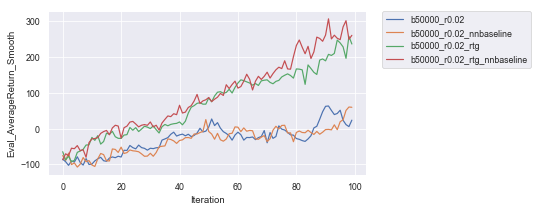

In [46]:
plt.figure(figsize=figsize)
sns.lineplot(data=data_q4_optimal, x='Iteration', y='Eval_AverageReturn_Smooth', hue='Config')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(export_dir, 'q4_optimal.pdf'), bbox_inches='tight')